## Introduction to Data Science

### Analizing Data - Descriptive Statistics 

In [1]:
import os
import codecs
import time
import datetime
import pathlib

import pandas as pd
import numpy as np
import scipy.stats as ss
import scipy.signal as signal
from scipy.io.arff import loadarff

import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import pylab as pl

Univariate Graphs
-----------------
- Where are the points?  
- How are they distributed?  
- What is the range of values?  
- Which are the typical, maximum and minimum values?  
- Are there clusters or trends?  
- Is the distribution symetrical?  
- Are there outliers?  
- Which features can be noted?  
- Are there descontinuities?  
- Are there unexpected values?  
- Can you identify known patterns?  

Specifying the path to the files:

In [2]:
datapath = pathlib.Path("../datasets/CSVs/")
outputs = pathlib.Path("../outputs/")

#### Loading the datasets

In [3]:
# First Dataset
!head ../datasets/CSVs/presidents.csv

 1       Washington      94
 2       Adams           48
 3       Jefferson       96
 4       Madison         96
 5       Monroe          96
 6       Adams           48
 7       Jackson         96
 8       Van_Buren       48
 9       Harrison         1
10       Tyler           47


In [4]:
presidents = np.genfromtxt(datapath / "presidents.csv", usecols=(2))
presidents_names = np.genfromtxt(datapath / "presidents.csv", usecols=(1), dtype=(str))

In [5]:
presidents

array([ 94.,  48.,  96.,  96.,  96.,  48.,  96.,  48.,   1.,  47.,  48.,
        16.,  32.,  48.,  48.,  49.,  47.,  96.,  48.,   7.,  41.,  48.,
        48.,  48.,  54.,  90.,  48.,  96.,  29.,  67.,  48., 146.,  92.,
        96.,  34.,  62.,  67.,  29.,  48.,  96.,  48.,  96.,  96.])

In [6]:
presidents_names

array(['Washington', 'Adams', 'Jefferson', 'Madison', 'Monroe', 'Adams',
       'Jackson', 'Van_Buren', 'Harrison', 'Tyler', 'Polk', 'Taylor',
       'Filmore', 'Pierce', 'Buchanan', 'Lincoln', 'Johnson', 'Grant',
       'Hayes', 'Garfield', 'Arthur', 'Cleveland', 'Harrison',
       'Cleveland', 'McKinley', 'Roosevelt', 'Taft', 'Wilson', 'Harding',
       'Coolidge', 'Hoover', 'Roosevelt', 'Truman', 'Eisenhower',
       'Kennedy', 'Johnson', 'Nixon', 'Ford', 'Carter', 'Reagan', 'Bush',
       'Clinton', 'Bush'], dtype='<U10')

In [7]:
df_presidents = pd.read_csv(datapath / "presidents.csv", header=None, sep='\s+', names=['Name', 'Other'], index_col=0)
df_presidents.head()

,Name,Other
1,Washington,94
2,Adams,48
3,Jefferson,96
4,Madison,96
5,Monroe,96


#### Plotting with MathPlotLib

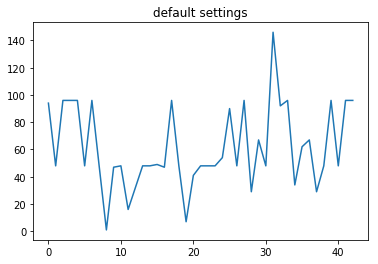

In [8]:
plt.plot(presidents)
plt.title('default settings')
plt.show()

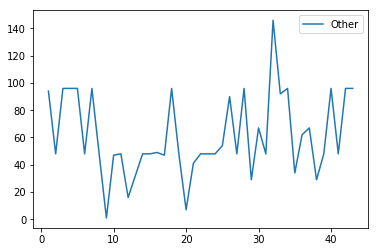

In [9]:
df_presidents.plot()

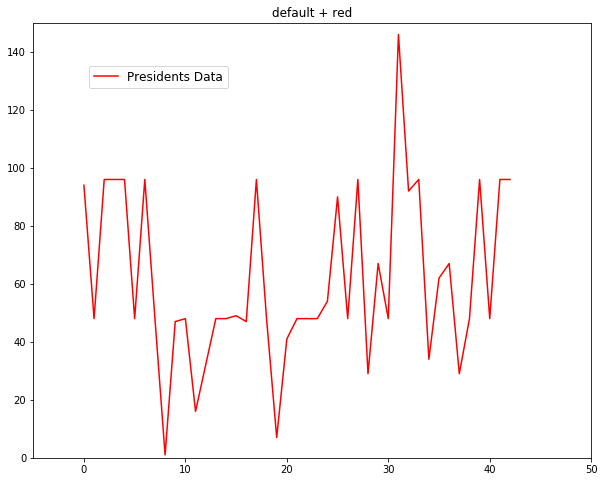

In [10]:
plt.figure(figsize=(10,8))
plt.plot(presidents,'r')
plt.title('default + red')
plt.legend(('Presidents Data',), loc=(0.1,0.85), fontsize=12)

P = plt.gca()
P.axis([-5.0,50.0,0.0,150.0])
plt.show()

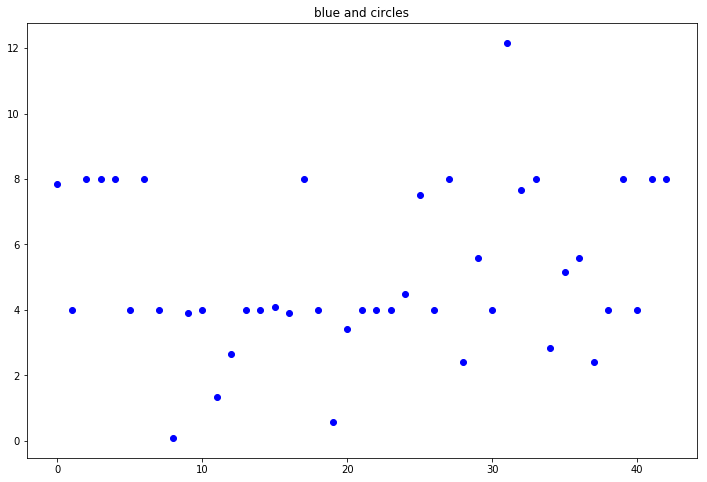

In [11]:
plt.figure(figsize=(12,8))
presidents_year = presidents/12.
plt.plot(presidents_year,'bo')
plt.title('blue and circles')

#plt.plot(presidents_year,'g.')
#plt.title('green and dots')

plt.show()

Histograms

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.hist

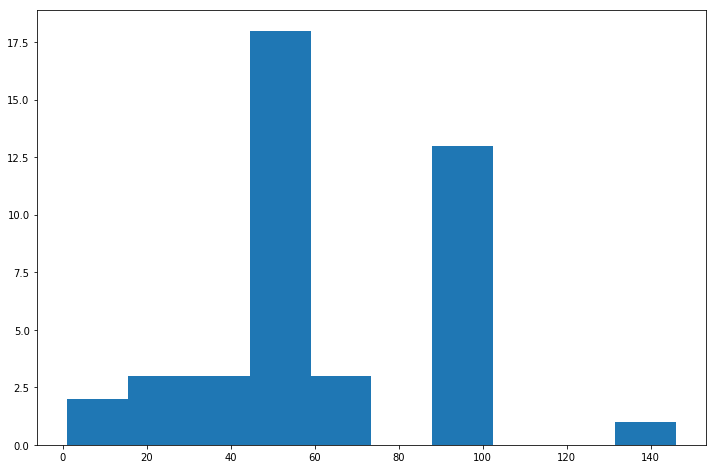

In [12]:
plt.figure(figsize=(12,8))
nbins=10
plt.hist(presidents, bins=nbins)
plt.show()

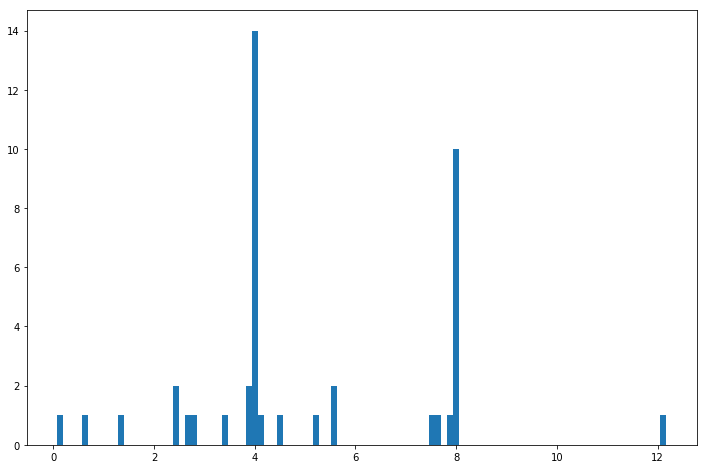

In [13]:
plt.figure(figsize=(12,8))
plt.hist(presidents_year, bins=10*nbins)
plt.show()

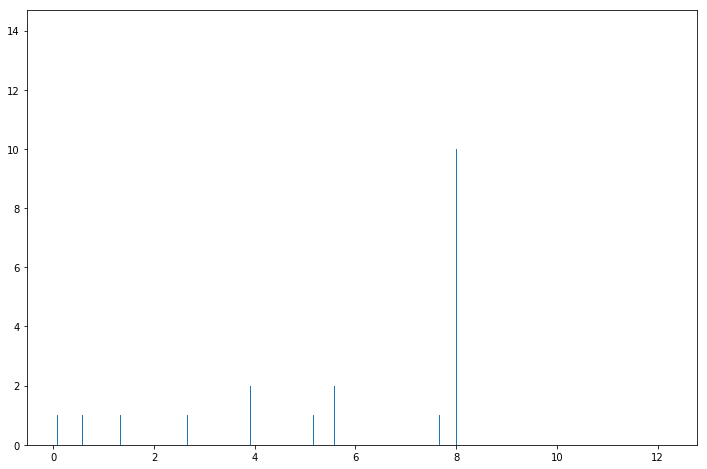

In [14]:
plt.figure(figsize=(12,8))
plt.hist(presidents_year, bins=100*nbins)
plt.show()

Gathering some information on the datasets:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html



In [15]:
server_data = np.loadtxt(datapath / "serverdata.csv")
ss.describe(server_data)

DescribeResult(nobs=1000, minmax=(44.5, 2985.29), mean=849.18857, variance=456853.1843964515, skewness=1.3048517528837618, kurtosis=1.0261430787200698)

Usando uma série do Pandas  
http://pandas.pydata.org/

In [16]:
df_server = pd.Series(server_data)
df_server.describe()

count    1000.000000
mean      849.188570
std       675.909154
min        44.500000
25%       347.265000
50%       630.940000
75%      1125.880000
max      2985.290000
dtype: float64

In [17]:
df_server.head()

0     452.42
1     318.58
2     144.82
3     129.13
4    1216.45
dtype: float64

Kernel Density Estimates
------------------------
http://en.wikipedia.org/wiki/Kernel_density_estimation  
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

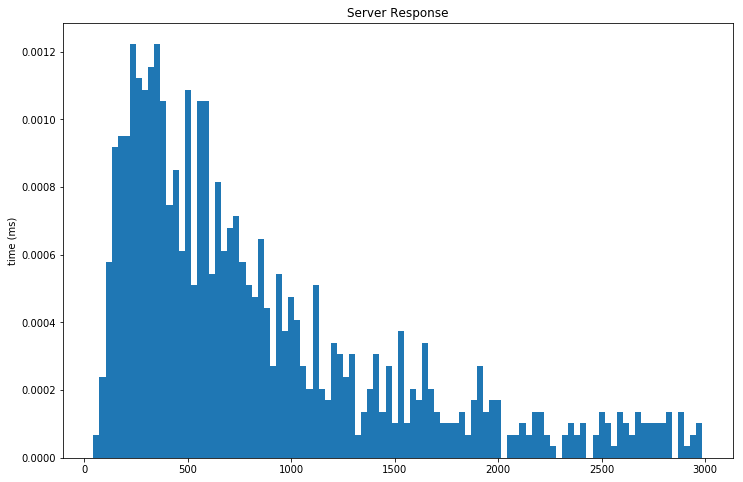

In [18]:
plt.figure(figsize=(12,8))
nbins=100
plt.hist(server_data, bins=nbins, density=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (ms)')
plt.show()

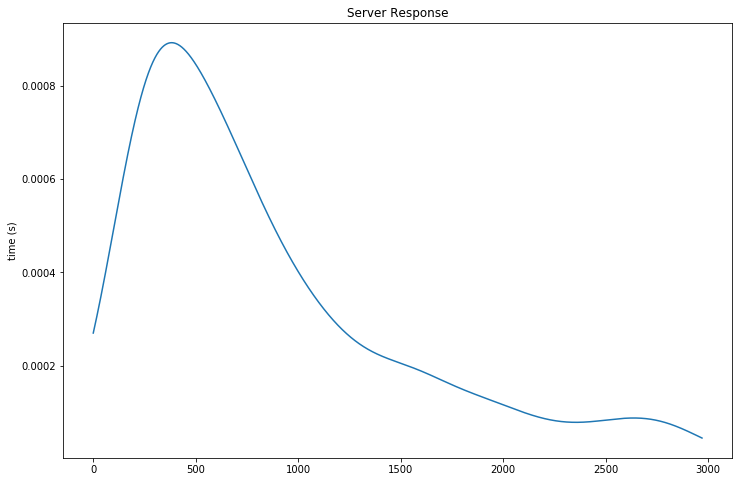

In [19]:
plt.figure(figsize=(12,8))
gkde = ss.gaussian_kde(server_data)
plt.plot(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1), 
         gkde.evaluate(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1)))
plt.title('Server Response')
plt.ylabel('time (s)')
plt.show()

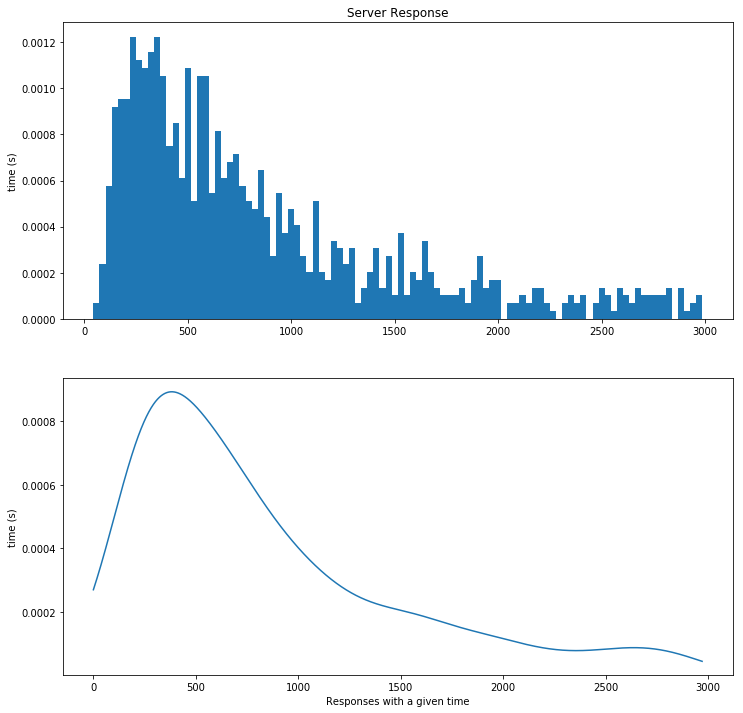

In [20]:
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
nbins=100
plt.hist(server_data, bins=nbins, density=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (s)')

plt.subplot(2, 1, 2)
gkde = ss.gaussian_kde(server_data)
plt.plot(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1), 
         gkde.evaluate(np.arange(0,(1.01*(max(server_data)-min(server_data))),.1)))   
plt.xlabel('Responses with a given time')
plt.ylabel('time (s)')

plt.show()

Cumulative Frequency
--------------------
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cumfreq.html#scipy.stats.cumfreq

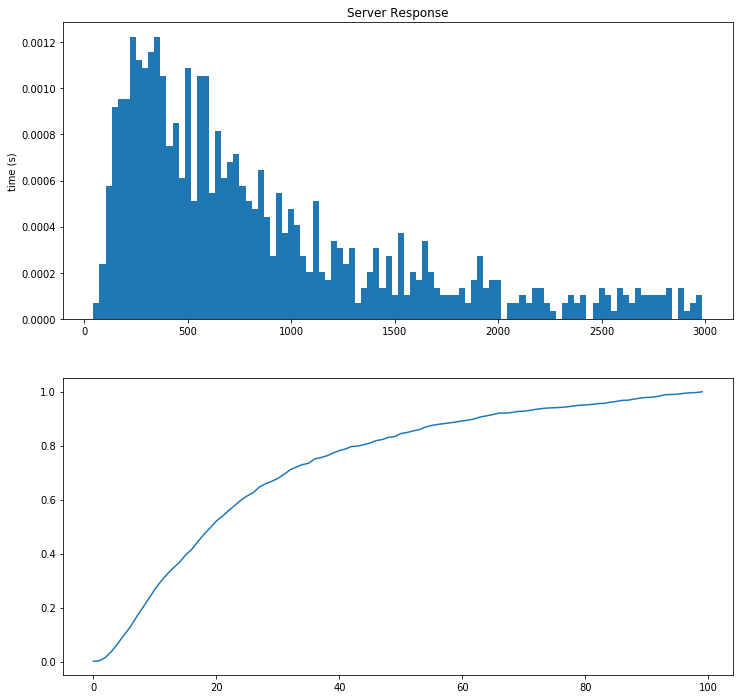

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
nbins=100
plt.hist(server_data, bins=nbins, density=True, align='mid')
plt.title('Server Response')
plt.ylabel('time (s)')

plt.subplot(2, 1, 2)
disc = ss.cumfreq(server_data, numbins=nbins)
plt.plot(disc[0]/len(server_data))

plt.show()

Box and Whisker Plots
---------------------
http://en.wikipedia.org/wiki/Box_plot  
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.boxplot

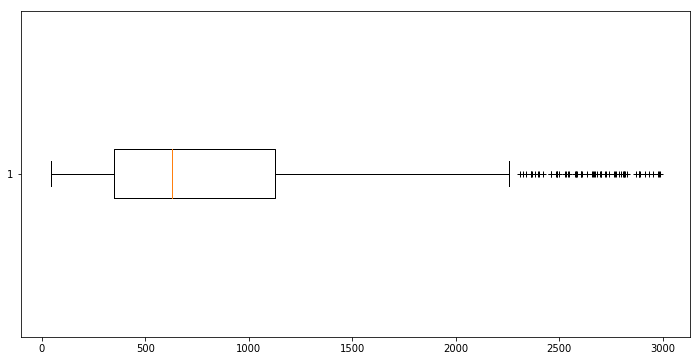

In [22]:
plt.figure(figsize=(12,6))
plt.boxplot(server_data, notch=0, sym='+', vert=0, whis=1.5, positions=None, widths=None)
plt.show()

In [23]:
#three series of data
glass_data = np.loadtxt(datapath / "glass.data.csv", usecols=(1,2,10), delimiter=',')

In [24]:
ss.describe(glass_data)

DescribeResult(nobs=214, minmax=(array([ 1.51115, 10.73   ,  1.     ]), array([ 1.53393, 17.38   ,  7.     ])), mean=array([ 1.51836542, 13.40785047,  2.78037383]), variance=array([9.22254137e-06, 6.66841367e-01, 4.42571629e+00]), skewness=array([1.61401505, 0.45099172, 1.10708511]), kurtosis=array([ 4.78935423,  2.95347658, -0.30093706]))

In [25]:
pd_glass = pd.DataFrame(glass_data)
pd_glass.describe()

,0,1,2
count,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.780374
std,0.003037,0.816604,2.103739
min,1.511150,10.730000,1.000000
25%,1.516523,12.907500,1.000000
50%,1.517680,13.300000,2.000000
75%,1.519157,13.825000,3.000000
max,1.533930,17.380000,7.000000


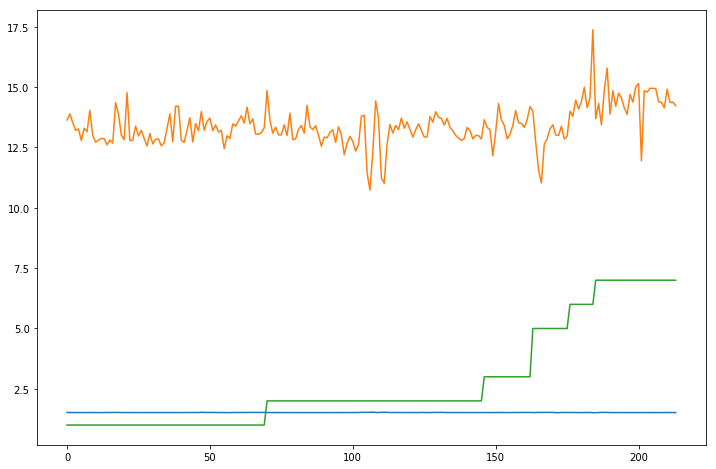

In [26]:
plt.figure(figsize=(12,8))
plt.plot(glass_data)
plt.show()

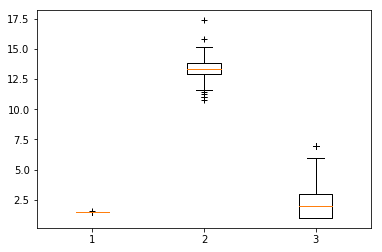

In [27]:
plt.boxplot(glass_data, notch=0, sym='+', vert=1, whis=1.5, positions=None, widths=None)
plt.show()

## Two variable graphs

Association and Causality  
Dependency and Independency  
Correlation and Covariance

A special case of two variable graphs are the time series  
http://en.wikipedia.org/wiki/Time_series  

+ Trend (linear and non-linear)
+ Seasonality (adictive and multiplicative)  
+ Noise  
+ Other(!)  


Ex: Trend and seasonality in Mauna Loa CO2 emissions  
http://www.esrl.noaa.gov/gmd/ccgg/trends/#mlo_full

In [28]:
maunaloa = pd.read_csv(datapath / 'co2_mm_mlo.txt', 
                       comment='#', 
                       delim_whitespace=True, 
                       names=['year','month','decimal date','average','interpolated','trend','#days'],
                       index_col=2)
maunaloa.head()

,year,month,average,interpolated,trend,#days
decimal date,,,,,,
1958.208,1958,3,315.71,315.71,314.62,-1
1958.292,1958,4,317.45,317.45,315.29,-1
1958.375,1958,5,317.50,317.50,314.71,-1
1958.458,1958,6,-99.99,317.10,314.85,-1
1958.542,1958,7,315.86,315.86,314.98,-1


In [29]:
maunaloa.shape

(678, 6)

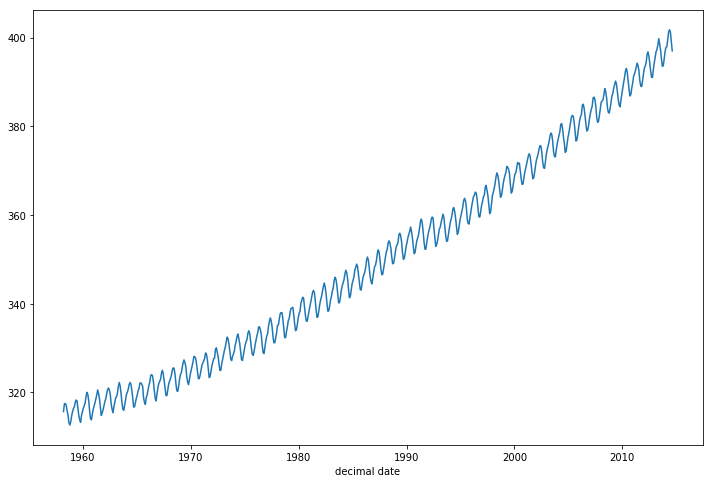

In [30]:
#maunaloa[['interpolated', 'average']].plot(figsize=(12,8))
maunaloa['interpolated'].plot(figsize=(12,8))

Treating Logarithmic Data
-------------------------
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.semilogx
    
http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.semilogy

http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.loglog

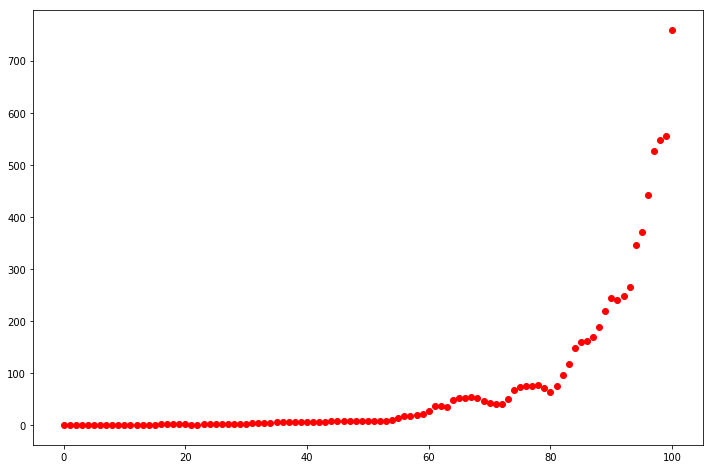

In [31]:
plt.figure(figsize=(12,8))
logexample = np.loadtxt(datapath / "logscale.csv")
plt.scatter(logexample[:,0], logexample[:,1], c='r', marker = 'o')
plt.show()

In [32]:
allo = np.loadtxt(datapath / "allometricscaling.csv", usecols=(1,2), delimiter=',')
allo

array([[9.00e+04, 6.00e+01],
       [2.00e+03, 1.50e+02],
       [5.00e+03, 9.00e+01],
       [6.00e+01, 4.50e+02],
       [1.50e+03, 2.75e+02],
       [5.00e+03, 1.90e+02],
       [1.20e+06, 4.40e+01],
       [8.00e+05, 6.50e+01],
       [1.50e+05, 7.00e+01],
       [1.00e+03, 2.05e+02],
       [5.00e+06, 3.00e+01],
       [1.20e+08, 2.00e+01]])

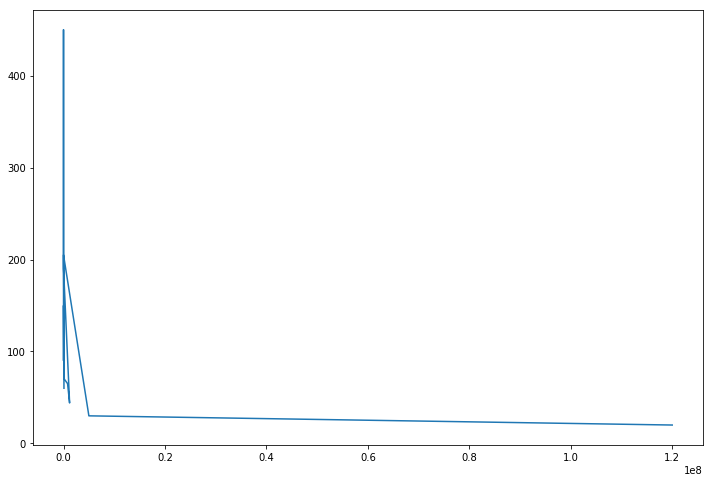

In [33]:
plt.figure(figsize=(12,8))
plt.plot(allo[:,0], allo[:,1])
plt.show()

In [34]:
print(ss.describe(allo))

DescribeResult(nobs=12, minmax=(array([60., 20.]), array([1.2e+08, 4.5e+02])), mean=array([1.06045467e+07, 1.37416667e+02]), variance=array([1.18887579e+15, 1.60191742e+04]), skewness=array([3.00603781, 1.34277389]), kurtosis=array([7.0572155 , 1.02788929]))


In [35]:
allo.shape

(12, 2)

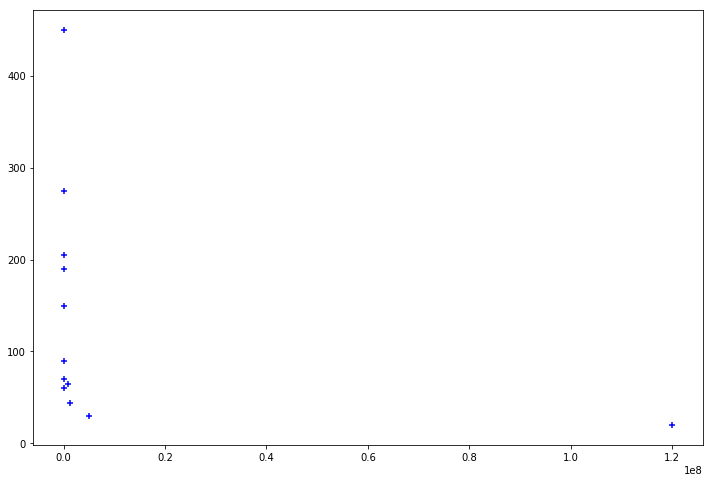

In [36]:
plt.figure(figsize=(12,8))
#plt.scatter(allo[:,0], allo[:,1])
plt.scatter(allo[:,0], allo[:,1], c='b', marker='+')
plt.show()

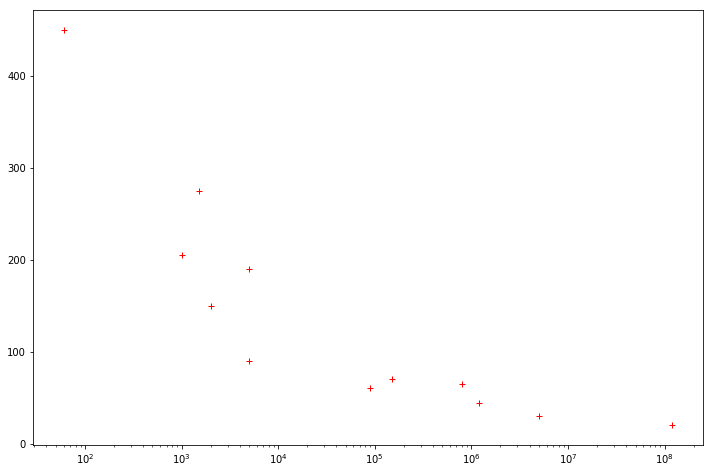

In [37]:
plt.figure(figsize=(12,8))
plt.semilogx(allo[:,0], allo[:,1], c='r', marker='+', ls='none')
plt.show()

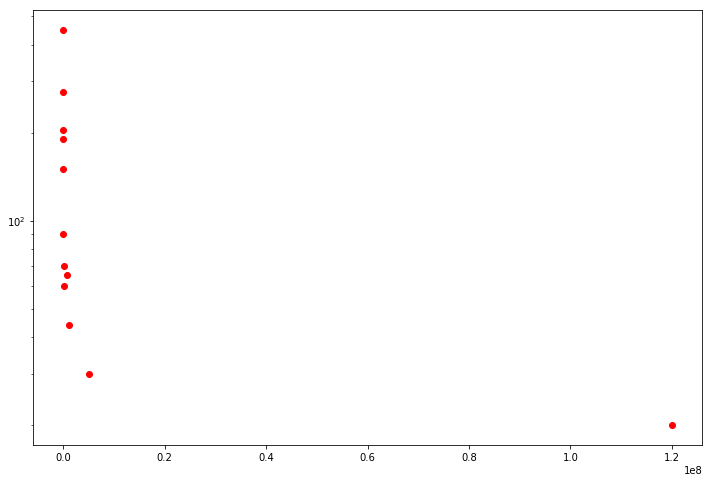

In [38]:
plt.figure(figsize=(12,8))
plt.semilogy(allo[:,0], allo[:,1], c='r', marker='o', ls='none')
plt.show()

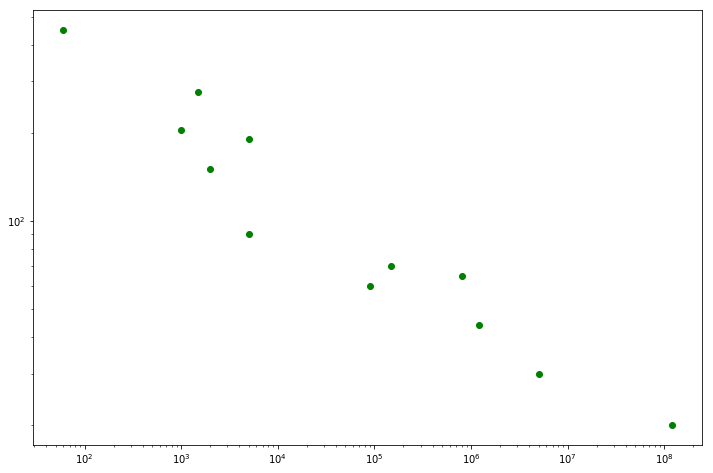

In [39]:
plt.figure(figsize=(12,8))
plt.loglog(allo[:,0], allo[:,1], c='g', marker='o', ls='none')
plt.show()

Smoothing with moving averages
------------------------------
http://matplotlib.sourceforge.net/api/mlab_api.html

The draft Lottery of 1969  
https://en.wikipedia.org/wiki/Draft_lottery_(1969)

In [40]:
lottery = pd.read_csv(datapath / "draft_lottery.csv", skiprows=38, sep="\t", usecols=[3,4])
lottery.head()

,Day_of_year,Draft_No.
0,1,305
1,2,159
2,3,251
3,4,215
4,5,101


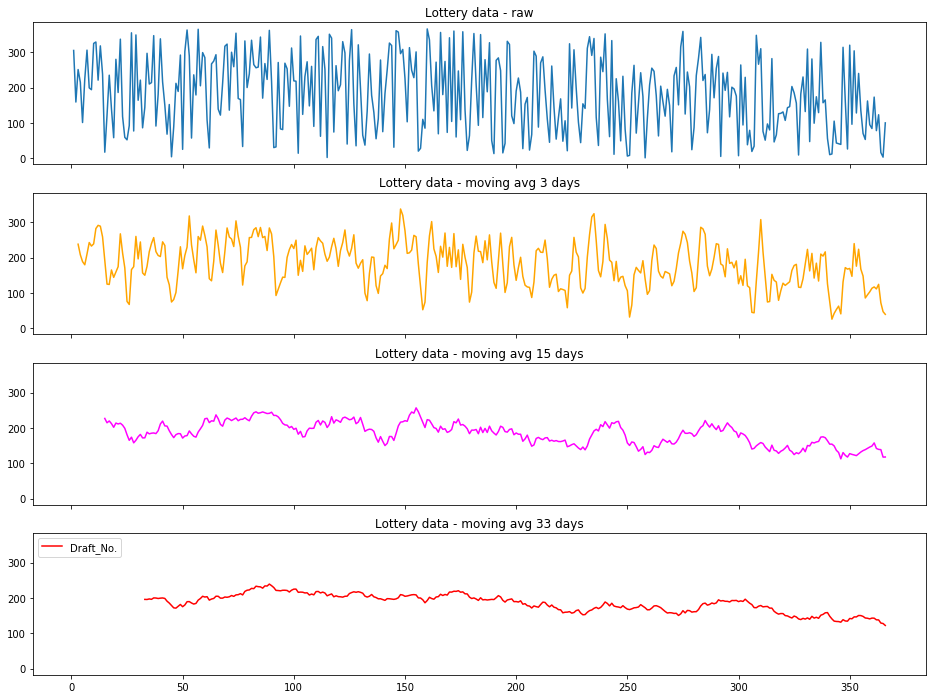

In [41]:
rolling_mean = lottery["Draft_No."].rolling(window=20).mean()
rolling_mean2 = lottery["Draft_No."].rolling(window=50).mean()

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(16,12), sharex=True, sharey=True)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
ax[0].plot(lottery.Day_of_year, lottery["Draft_No."], label='Lottery data - raw')
ax[0].set_title('Lottery data - raw')
ax[1].plot(lottery.Day_of_year, lottery["Draft_No."].rolling(window=3).mean(), color='orange')
ax[1].set_title('Lottery data - moving avg 3 days')
ax[2].plot(lottery.Day_of_year, lottery["Draft_No."].rolling(window=15).mean(), color='magenta')
ax[2].set_title('Lottery data - moving avg 15 days')
ax[3].plot(lottery.Day_of_year, lottery["Draft_No."].rolling(window=33).mean(), color='red')
ax[3].set_title('Lottery data - moving avg 33 days')
plt.legend(loc='upper left')
#f.subplots_adjust(hspace=0)
plt.show()

In [42]:
sunspot = pd.read_csv(datapath / "sunspot_yearnum.dat", header=None, delim_whitespace=True, names=["years","measurements"])
sunspot.set_index("years", drop=True, inplace=True)
sunspot.head()

,measurements
years,
1610,0.0
1611,0.2
1612,1.5
1613,0.4
1614,0.0


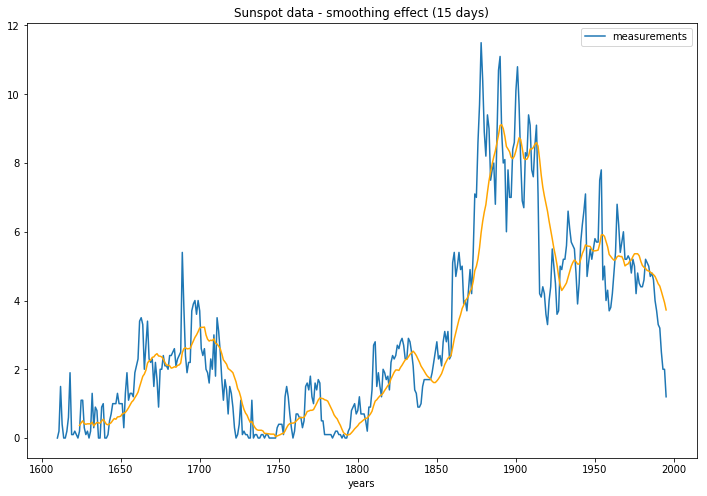

In [43]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
sunspot.plot(ax=ax, figsize=(12,8))
ax.plot(sunspot.rolling(window=15).mean(), color='orange')
plt.title('Sunspot data - smoothing effect (15 days)')
plt.show()

Filtering - Residuals
---------------------

One way of finding patterns remaining in data after applying some smoothing technique is to subtract the smoothed data from the original data, and try to fing some residuals. If there are some, that means that our smoothing function didn't capture all the information from the original signal.
 
http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics  
http://docs.scipy.org/doc/numpy/reference/generated/numpy.subtract.html  
http://en.wikipedia.org/wiki/Filter_(signal_processing)

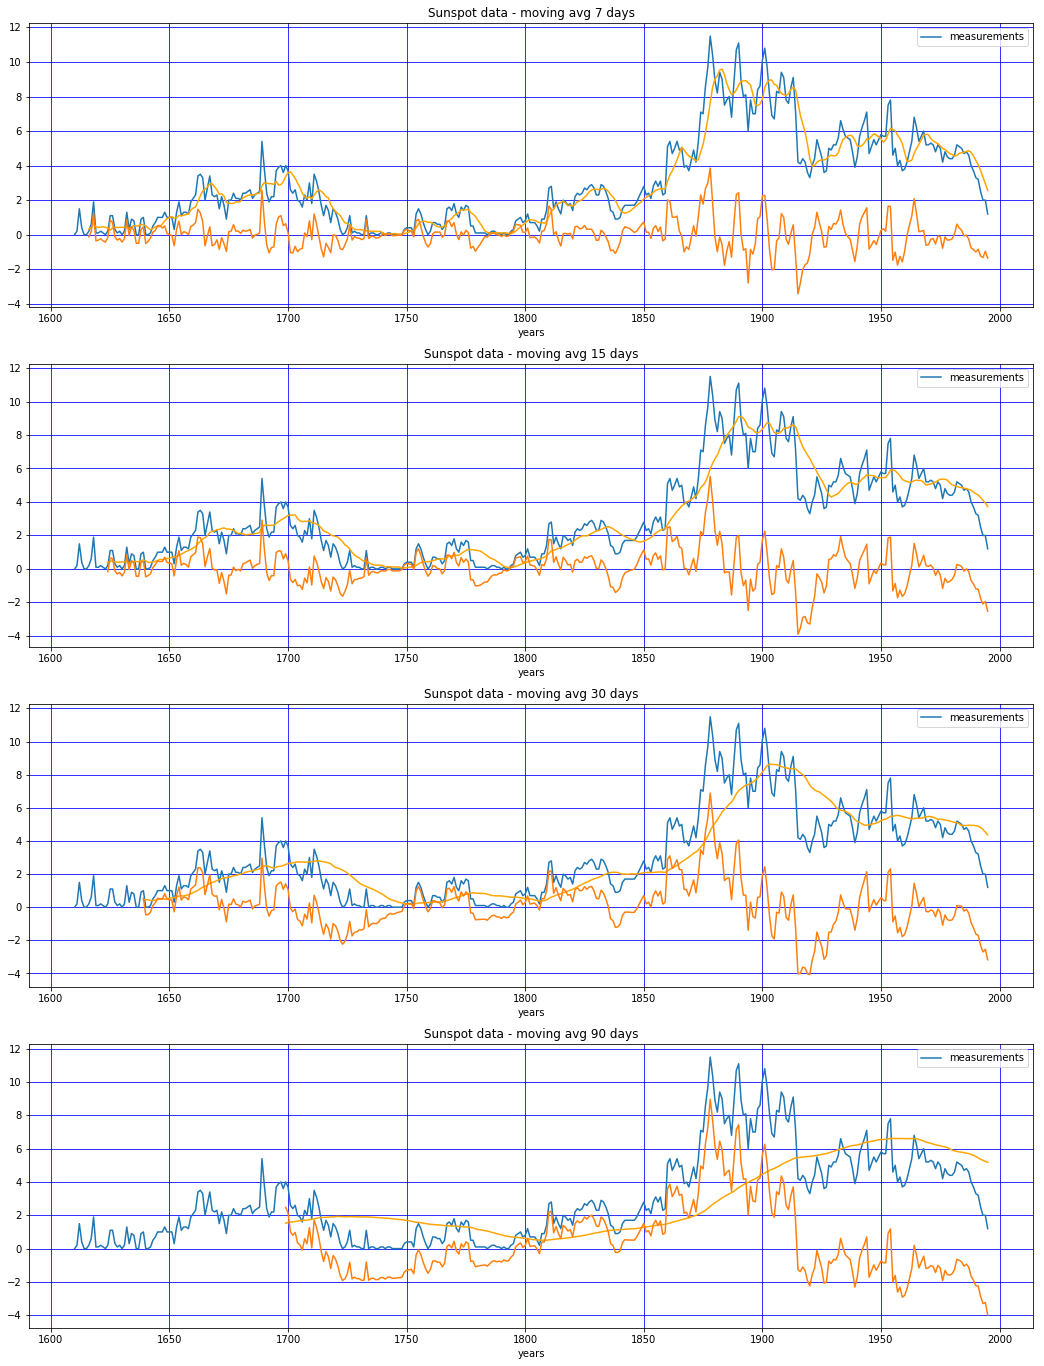

In [44]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(18,24))

sunspot.plot(ax=ax[0])
ax[0].plot(sunspot.rolling(window=7).mean(), color='orange')
ax[0].plot(np.subtract(sunspot,sunspot.rolling(window=7).mean()))
ax[0].grid(b=True, which='major', color='b', linestyle='-')
ax[0].set_title('Sunspot data - moving avg 7 days')

sunspot.plot(ax=ax[1])
ax[1].plot(sunspot.rolling(window=15).mean(), color='orange')
ax[1].plot(np.subtract(sunspot,sunspot.rolling(window=15).mean()))
ax[1].grid(b=True, which='major', color='b', linestyle='-')
ax[1].set_title('Sunspot data - moving avg 15 days')

sunspot.plot(ax=ax[2])
ax[2].plot(sunspot.rolling(window=30).mean(), color='orange')
ax[2].plot(np.subtract(sunspot,sunspot.rolling(window=30).mean()))
ax[2].grid(b=True, which='major', color='b', linestyle='-')
ax[2].set_title('Sunspot data - moving avg 30 days')

sunspot.plot(ax=ax[3])
ax[3].plot(sunspot.rolling(window=90).mean(), color='orange')
ax[3].plot(np.subtract(sunspot,sunspot.rolling(window=90).mean()))
ax[3].grid(b=True, which='major', color='b', linestyle='-')
ax[3].set_title('Sunspot data - moving avg 90 days')

plt.show()

Linear and Polynomial Regressions
---------------------------------
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html      
http://www.scipy.org/Cookbook/LinearRegression      

http://en.wikipedia.org/wiki/Linear_regression  
http://en.wikipedia.org/wiki/Polynomial_regression  

Using Pylab's linear regression

[2.3 0.5]
[2.8 5.1 7.4 9.7]
[2.8 5.1 7.4 9.7]


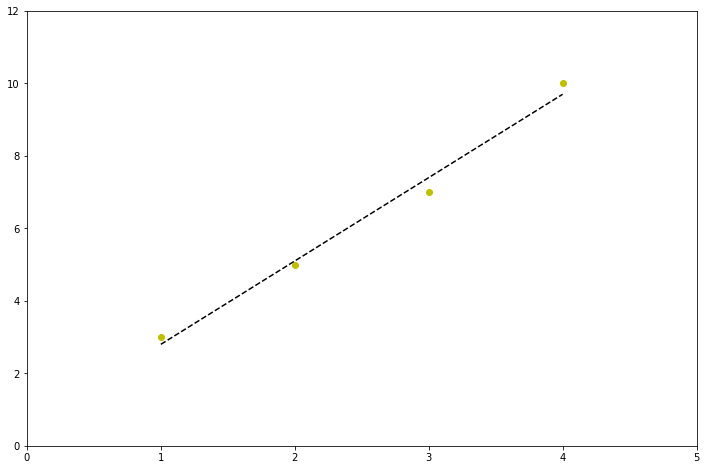

slope is: 2.3
intercept: is 0.5
r_value is: 0.9943767126843689
r_squared is: 0.99
p_value is: 0.0056232873156311074
std_err is: 0.1732050807568879


In [45]:
x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

fit = pl.polyfit(x,y,1) # 1 is the degree of polynomial
fit_fn = pl.poly1d(fit) # fit_fn is now a function which takes in x and returns an estimate for y
val_fn = pl.polyval(fit, x) #val_fn are the values predicted by that function
print(fit)
print(fit_fn(x))
print(val_fn)    #are the same

plt.figure(figsize=(12,8))
plt.plot(x,y, 'yo')
#plt.plot(x, fit_fn(x), '--k')
plt.plot(x, val_fn, '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()

slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print('slope is: {}'.format(slope))
print('intercept: is {}'.format(intercept))
print('r_value is: {}'.format(r_value))
print('r_squared is: {:.2f}'.format(r_value**2))
print('p_value is: {}'.format(p_value))
print('std_err is: {}'.format(std_err))

#### Be careful with regressions!  

http://matplotlib.org/1.2.1/examples/pylab_examples/anscombe.html  
    
Edward Tufte uses this example from Anscombe to show 4 datasets of x and y that have the same mean, standard deviation, and regression line, but which are qualitatively different.

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


<Figure size 432x288 with 0 Axes>

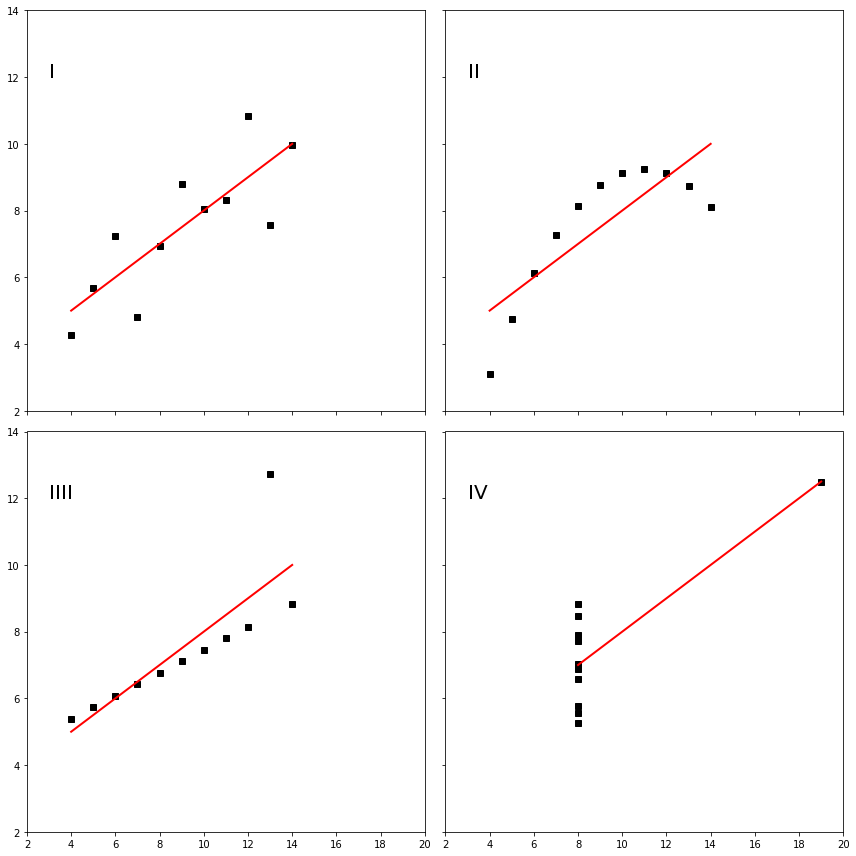

In [46]:
x =  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

def fit(x):
    return 3+0.5*x

plt.clf()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12), sharex='col', sharey='row')

xfit = np.array([np.amin(x),np.amax(x)])
ax1.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
ax1.axis([2,20,2,14])
ax1.text(3,12, 'I', fontsize=20)

ax2.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
ax2.axis([2,20,2,14])
ax2.text(3,12, 'II', fontsize=20)

ax3.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
ax3.axis([2,20,2,14])
ax3.text(3,12, 'IIII', fontsize=20)

xfit = np.array([np.amin(x4),np.amax(x4)])
ax4.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
ax4.axis([2,20,2,14])
ax4.text(3,12, 'IV', fontsize=20)

plt.tight_layout()

#verify the stats
pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
for x,y in pairs:
    print('mean={:.2f}, std={:.2f}, r={:.2f}'.format(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))
plt.show()

Analysing the Boston Marathon results  
http://en.wikipedia.org/wiki/List_of_winners_of_the_Boston_Marathon

In [47]:
marathon_m = np.genfromtxt(datapath / "marathon.csv", usecols=(0,4), delimiter=',')
marathon_w = np.genfromtxt(datapath / "marathon.csv", usecols=(0,8), delimiter=',', skip_header=69)

In [48]:
t1 = np.linspace(1897,2014,len(marathon_m[:,0]))
t2 = np.linspace(1960,2014,len(marathon_w[:,0]))

In [49]:
s_m = pd.Series(marathon_m[:,1], index=marathon_m[:,0], name='Men')
s_w = pd.Series(marathon_w[:,1], index=marathon_w[:,0])
df_m_w = pd.concat([s_m,s_w], axis=1, keys=['Men','Women'])
df_m_w.tail()

,Men,Women
2010.0,125.866667,146.183333
2011.0,123.033333,142.600000
2012.0,132.666667,151.833333
2013.0,130.366667,146.416667
2014.0,128.616667,138.950000


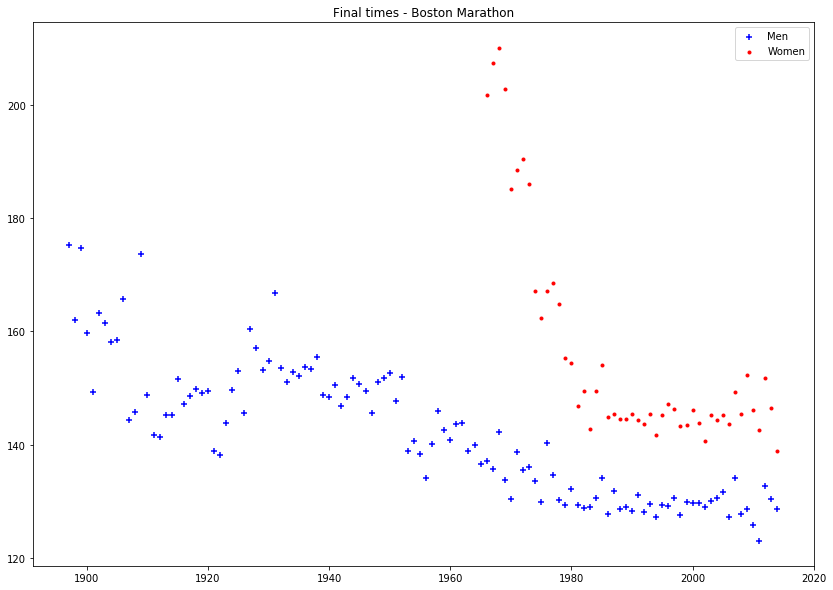

In [50]:
plt.figure(figsize=(14,10))
plt.scatter(marathon_m[:,0], marathon_m[:,1], c='b', marker='+')
plt.scatter(marathon_w[:,0], marathon_w[:,1], c='r', marker='.')
plt.title('Final times - Boston Marathon')
plt.legend(['Men','Women'])
plt.show()

Linear Regression

In [51]:
(a,b) = pl.polyfit(t1,marathon_m[:,1],1) 
xm_linear = pl.polyval([a,b],t1)
(a,b) = pl.polyfit(t2,marathon_w[:,1],1)
xf_linear = pl.polyval([a,b],t2)

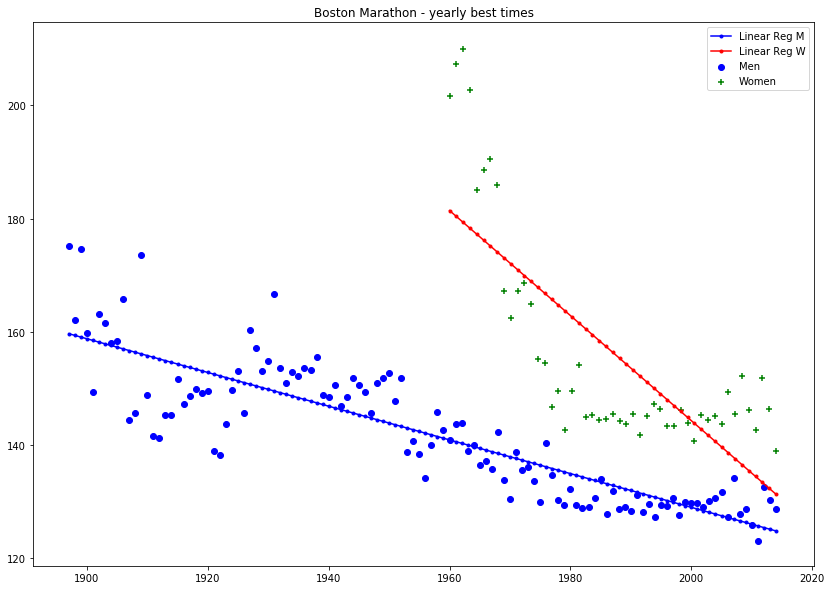

In [52]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_linear,'b.-')
plt.plot(t2, xf_linear,'r.-')
plt.legend(['Linear Reg M','Linear Reg W','Men','Women'], loc=0)
plt.show()

Regression with 2th order polynomial

In [53]:
(a,b,c) = pl.polyfit(t1,marathon_m[:,1],2)
xm_2th = pl.polyval([a,b,c],t1)
(a,b,c) = pl.polyfit(t2,marathon_w[:,1],2)
xw_2th = pl.polyval([a,b,c],t2)

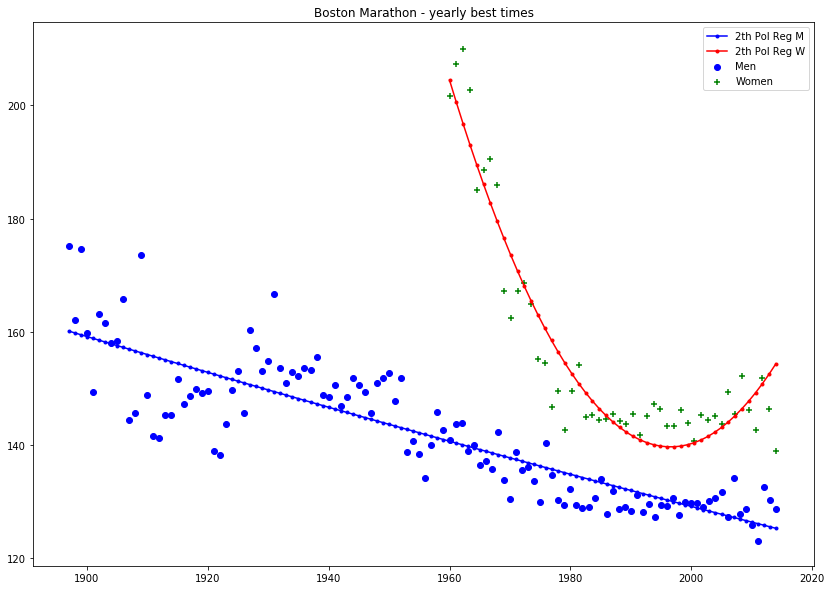

In [54]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_2th,'b.-')
plt.plot(t2, xw_2th,'r.-')
plt.legend(['2th Pol Reg M','2th Pol Reg W','Men','Women'], loc=0)
plt.show()

Regression with 3rd order polynomial

In [55]:
coefs_m = pl.polyfit(t1,marathon_m[:,1],3) 
xm_3th = pl.polyval(coefs_m,t1)
coefs_w = pl.polyfit(t2,marathon_w[:,1],3)
xw_3th = pl.polyval(coefs_w,t2)

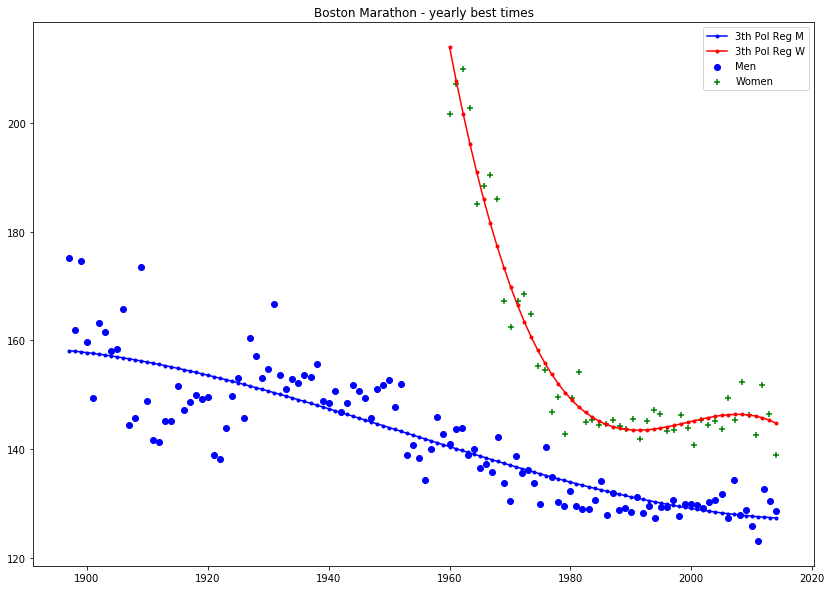

In [56]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_3th,'b.-')
plt.plot(t2, xw_3th,'r.-')
plt.legend(['3th Pol Reg M','3th Pol Reg W','Men','Women'], loc=0)
plt.show()

Regression with 4th order polynomial

In [57]:
coefs_m = pl.polyfit(t1,marathon_m[:,1],4) 
xm_4th = pl.polyval(coefs_m,t1)
coefs_w = pl.polyfit(t2,marathon_w[:,1],4)
xw_4th = pl.polyval(coefs_w,t2)

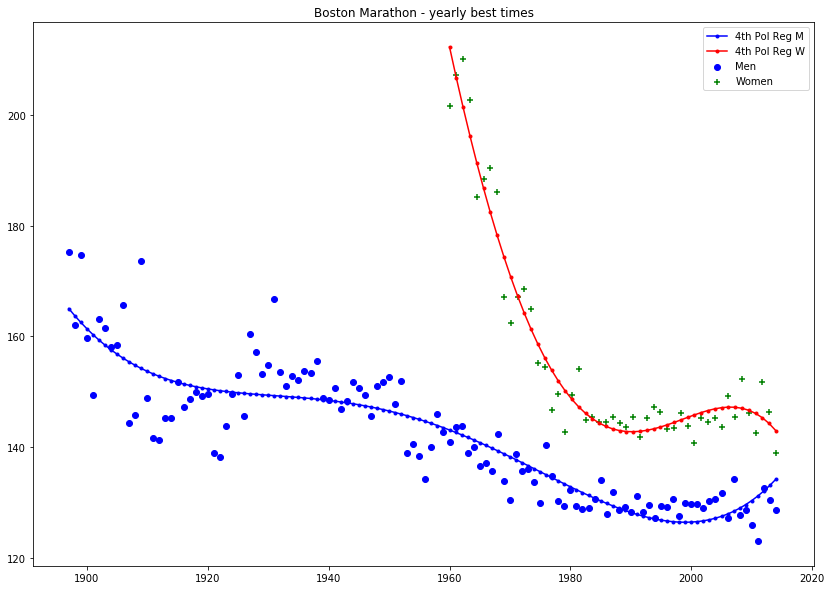

In [58]:
plt.figure(figsize=(14,10))
plt.title('Boston Marathon - yearly best times')
plt.scatter(t1, marathon_m[:,1], c='b', marker='o')
plt.scatter(t2, marathon_w[:,1], c='g', marker='+')
plt.plot(t1, xm_4th,'b.-')
plt.plot(t2, xw_4th,'r.-')
plt.legend(['4th Pol Reg M','4th Pol Reg W','Men','Women'], loc=0)
plt.show()

Linear regression in The Draft Lottery case:

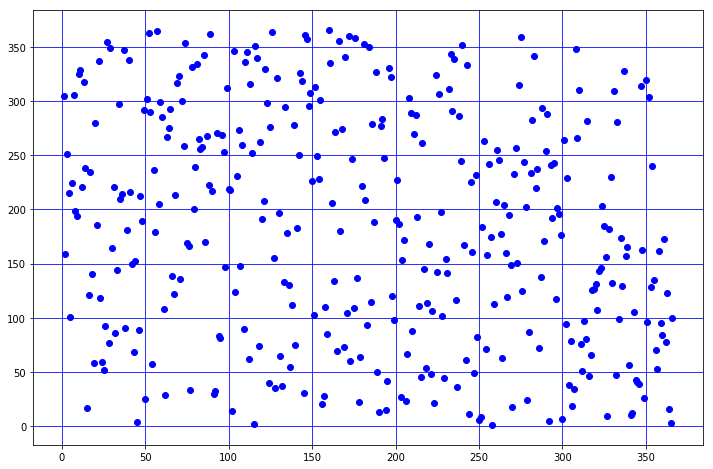

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(lottery.iloc[:,0], lottery.iloc[:,1], c='b', marker='o')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

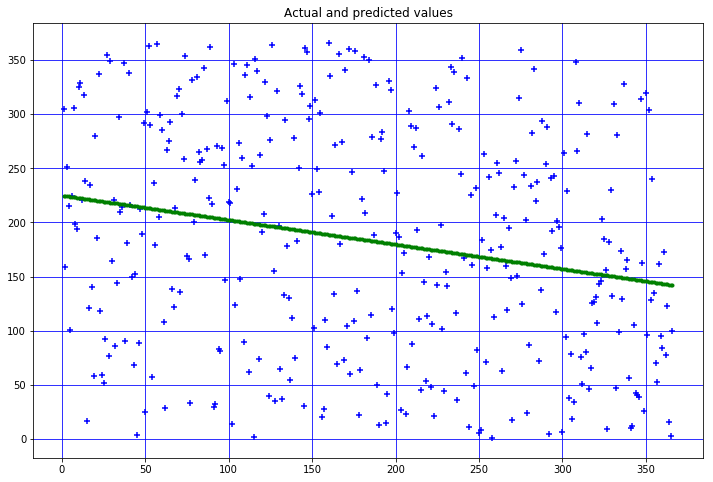

slope is: -0.22605939968829758
intercept: is 225.0092222471742
r_value is: -0.22604142701100727
r_squared is: 0.05
p_value is: 1.2638292721939644e-05
std_err is: 0.05106169978260039


In [60]:
plt.figure(figsize=(12,8))
plt.scatter(lottery.iloc[:,0], lottery.iloc[:,1], c='b', marker='+')

slope, intercept, r_value, p_value, std_err = ss.linregress(lottery.iloc[:,0],lottery.iloc[:,1])
draft_linear = pl.polyval([slope,intercept],lottery.iloc[:,0])
plt.plot(lottery.iloc[:,0], draft_linear,'g.')

plt.title('Actual and predicted values')
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

print('slope is: {}'.format(slope))
print('intercept: is {}'.format(intercept))
print('r_value is: {}'.format(r_value))
print('r_squared is: {:.2f}'.format(r_value**2))
print('p_value is: {}'.format(p_value))
print('std_err is: {}'.format(std_err))

#### Analysis of residuals

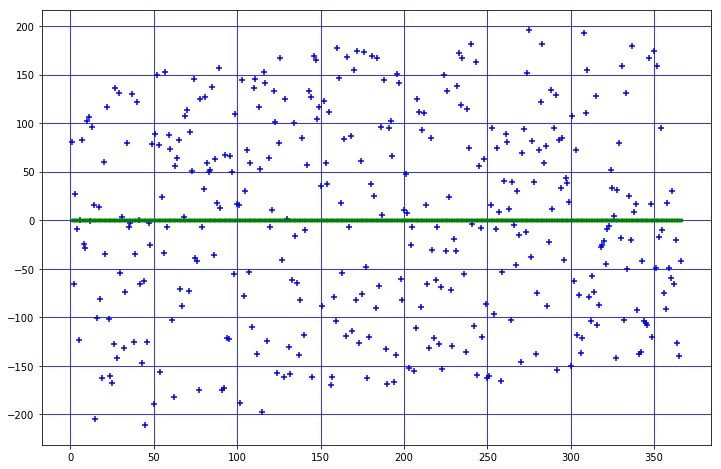

slope is: -2.493213260351512e-17
intercept: is 2.0900881311796468e-15
r_value is: -2.559254457517204e-17
r_squared is: 0.00
p_value is: 0.9999999999999996
std_err is: 0.051061699782600396


In [61]:
plt.figure(figsize=(12,8))

res = np.subtract(lottery.iloc[:,1], draft_linear)
plt.scatter(lottery.iloc[:,0], res, c='b', marker='+')

slope, intercept, r_value, p_value, std_err = ss.linregress(lottery.iloc[:,0],res)
res_linear = pl.polyval([slope,intercept],lottery.iloc[:,0])
plt.plot(lottery.iloc[:,0], res_linear,'g.')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

print('slope is: {}'.format(slope))
print('intercept: is {}'.format(intercept))
print('r_value is: {}'.format(r_value))
print('r_squared is: {:.2f}'.format(r_value**2))
print('p_value is: {}'.format(p_value))
print('std_err is: {}'.format(std_err))

#### Exploring Bovespa stock prices

In [62]:
cotacoes = pd.read_csv(datapath / "cotacoesbovespa.txt")
print(cotacoes.shape)
cotacoes.head()

(4513, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
0,2011-07-25,60264.0,60285.0,59640.0,59971.0,1772400,59971.0
1,2011-07-22,60263.0,60696.0,60077.0,60270.0,1809600,60270.0
2,2011-07-21,59120.0,60441.0,59120.0,60263.0,2159600,60263.0
3,2011-07-20,59094.0,59552.0,59045.0,59120.0,1946000,59120.0
4,2011-07-19,58838.0,59394.0,58677.0,59082.0,1888000,59082.0


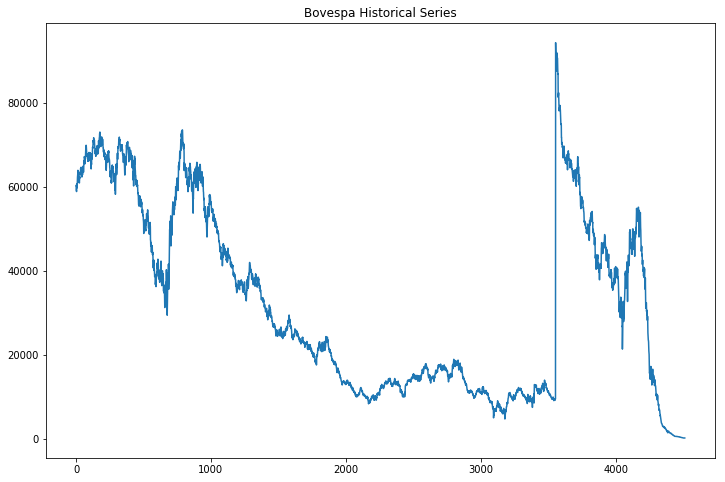

In [63]:
plt.figure(figsize=(12,8))
plt.plot(cotacoes['Open'])
plt.title('Bovespa Historical Series')
plt.show()

We can see there is a great scale change... maybe it's a good idea to treat as two separate series

In [64]:
cotacoes.index

RangeIndex(start=0, stop=4513, step=1)

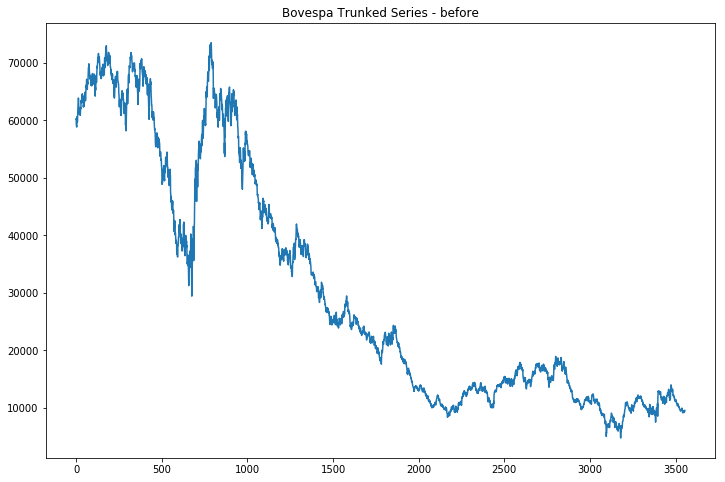

In [65]:
cotacoes_before = cotacoes.iloc[0:3554,1].values

plt.figure(figsize=(12,8))
plt.title('Bovespa Trunked Series - before')
plt.plot(cotacoes_before)
plt.show()

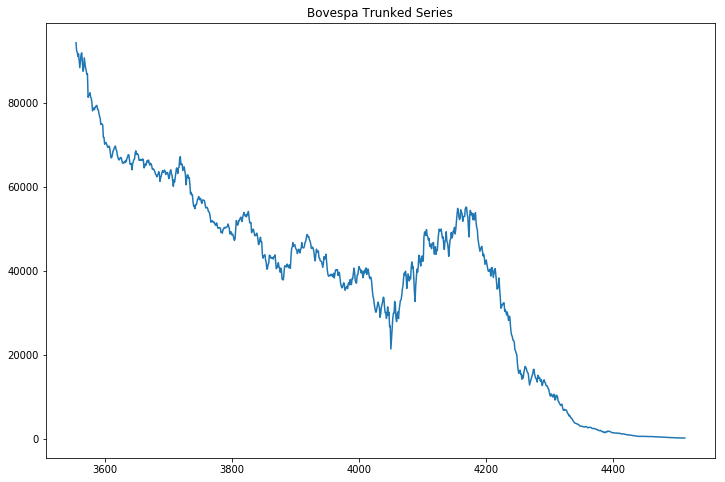

In [66]:
plt.figure(figsize=(12,8))
plt.title('Bovespa Trunked Series')
plt.plot(cotacoes.iloc[3555:,1])
plt.show()

Smoothing with a gaussian filter
--------------------------------
https://stackoverflow.com/questions/27099555/gaussian-kernel-density-smoothing-for-pandas-dataframe-resample

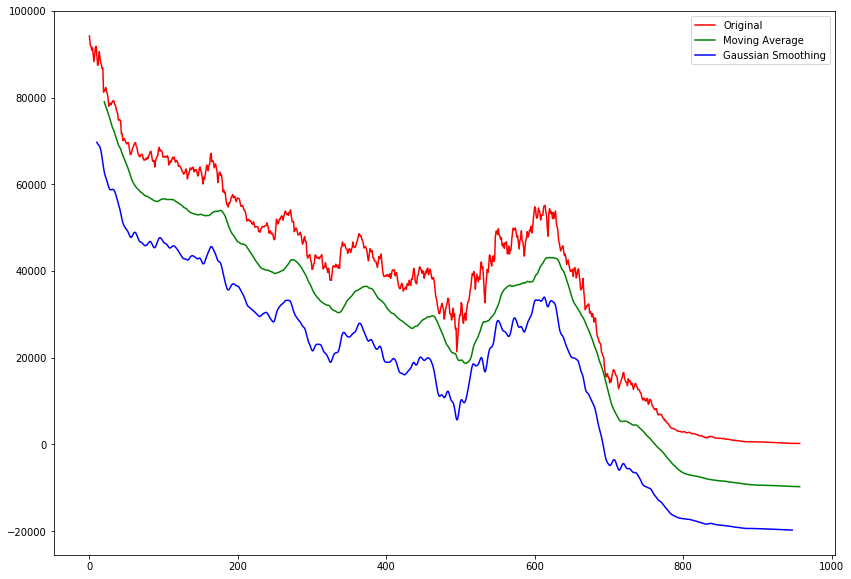

In [67]:
plt.figure(figsize=(14,10))

plt.plot(np.arange(len(cotacoes.iloc[3555:,1])), cotacoes.iloc[3555:,1],'r')

plt.plot(np.arange(len(cotacoes.iloc[3555:,1])), cotacoes.iloc[3555:,1].rolling(window=21).mean()-10000, 'g')

plt.plot(np.arange(len(cotacoes.iloc[3555:,1])), 
         cotacoes.iloc[3555:,1].rolling(window=21, win_type='gaussian', center=True).mean(std=2)-20000, 'b')

plt.legend(['Original','Moving Average','Gaussian Smoothing'], loc=0)
plt.show()

Calculating Cross-Correlation  
http://en.wikipedia.org/wiki/Cross-correlation  
http://stackoverflow.com/questions/15989384/cross-correlation-of-non-periodic-function-with-numpy  

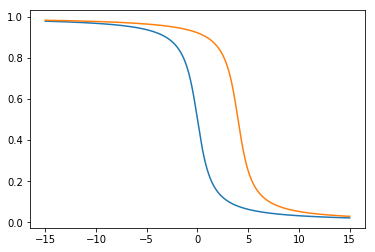

In [68]:
x = np.linspace(-15, 15, 4000)
f1 = (np.arctan(-x) + np.pi/2) / np.pi
f2 = (np.arctan(-x + 4) + np.pi/2) / np.pi
plt.plot(x,f1)
plt.plot(x,f2)
plt.show()

peak correlation occurs at: -3.747186796699175


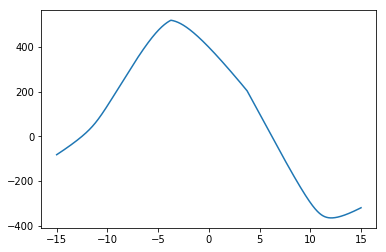

In [69]:
L4 = int(len(f2)/8)
sf2 = f2[L4:-L4]
c = pl.correlate(f1-np.mean(f1), sf2-np.mean(f1), 'same')
print("peak correlation occurs at:", x[np.argmax(c)])  # -3.7471867967
plt.plot(x,c)
plt.show()

## Using Pingouin  
Code borrowed from [here](https://github.com/erykml/medium_articles/blob/master/Statistics/pingouin.ipynb)

In [70]:
import pingouin as pg
import numpy as np
import pandas as pd 
import seaborn as sns

from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
%config InlineBackend.figure_format ='retina'
%matplotlib inline
sns.set_style('darkgrid')

### Statistical functionalities  
#### T-test

In [72]:
# set seed
np.random.seed(42)

# generate data
x = np.random.normal(loc=2, scale=3, size=100)
y = np.random.normal(loc=0, scale=1, size=100)

In [73]:
ttest_ind(x, y)

Ttest_indResult(statistic=5.772051762923951, pvalue=2.986379980167149e-08)

In [74]:
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.772052,198,two-sided,2.986380e-08,"[1.1, 2.24]",0.816291,3.671e+05,0.999923


#### Power analysis

In [75]:
# parameters  
EFFECT_SIZE = 0.5
ALPHA = 0.05 
POWER = 0.8

# using statsmodels
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=EFFECT_SIZE, 
                                         power=POWER, 
                                         alpha=ALPHA)

print(f'Required sample size (statsmodels): {sample_size:.0f}')

# using pingouin
sample_size = pg.power_ttest(d=EFFECT_SIZE, 
                             alpha=ALPHA, 
                             power=POWER, 
                             n=None)

print(f'Required sample size (pingouin): {sample_size:.0f}')

Required sample size (statsmodels): 64
Required sample size (pingouin): 64


#### Plotting

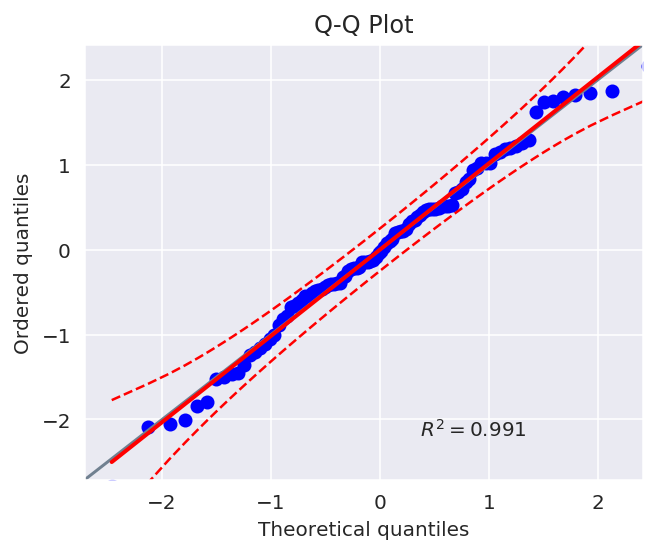

In [76]:
np.random.seed(42)
x = np.random.normal(size=100)
ax = pg.qqplot(x, dist='norm')

#### ANOVA

In [77]:
# loading and transforming data
df = pg.read_dataset('anova')
df = df.drop('Subject', axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
#df.hair_color = pd.Categorical(df.hair_color)
#df['code'] = df.hair_color.cat.codes
df.head()

,hair_color,pain_threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48


In [78]:
aov = pg.anova(dv='pain_threshold', between='hair_color', data=df, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,hair_color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


In [80]:
ols_model = ols('pain_threshold ~ hair_color', data=df).fit()
aov = sm.stats.anova_lm(ols_model)
aov

,df,sum_sq,mean_sq,F,PR(>F)
hair_color,3.0,1360.726316,453.575439,6.791407,0.004114
Residual,15.0,1001.800000,66.786667,NaN,NaN


#### Linear Regression

In [81]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [82]:
lm = pg.linear_regression(X, y)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.459488,5.103459,7.144074,3.283438e-12,0.740643,0.73379,26.432226,46.486751
1,x1,-0.108011,0.032865,-3.286517,1.086810e-03,0.740643,0.73379,-0.172584,-0.043438
2,x2,0.046420,0.013727,3.381576,7.781097e-04,0.740643,0.73379,0.019449,0.073392
3,x3,0.020559,0.061496,0.334310,7.382881e-01,0.740643,0.73379,-0.100268,0.141385
4,x4,2.686734,0.861580,3.118381,1.925030e-03,0.740643,0.73379,0.993904,4.379563
5,x5,-17.766611,3.819744,-4.651257,4.245644e-06,0.740643,0.73379,-25.271634,-10.261589
6,x6,3.809865,0.417925,9.116140,1.979441e-18,0.740643,0.73379,2.988727,4.631004
7,x7,0.000692,0.013210,0.052402,9.582293e-01,0.740643,0.73379,-0.025262,0.026647
8,x8,-1.475567,0.199455,-7.398004,6.013491e-13,0.740643,0.73379,-1.867455,-1.083679
9,x9,0.306049,0.066346,4.612900,5.070529e-06,0.740643,0.73379,0.175692,0.436407


In [83]:
# adding the constant 
X = sm.add_constant(X)

# estimating the model
model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        19:42:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""